In [197]:


import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt


import os 

import re
import time


from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU

import datetime

import mplleaflet

import matplotlib.dates as dt
from matplotlib.dates import date2num





In [198]:
# load listings data into a pandas df

df1 = pd.read_csv ("speedClean.csv")  

In [199]:
df1.head()

,study_id,direction,lowSpeed,highSpeed,timestamp,address,street,nhood,combo,lat,lon
0,7129,Westbound,1,5.0,2012-10-23 00:00:00,71,A ST,SOUTH BOSTON,71 a st,42.342161,-71.054984
1,7129,Westbound,6,10.0,2012-10-23 00:00:00,71,A ST,SOUTH BOSTON,71 a st,42.342161,-71.054984
2,7129,Westbound,11,15.0,2012-10-23 00:00:00,71,A ST,SOUTH BOSTON,71 a st,42.342161,-71.054984
3,7129,Westbound,16,20.0,2012-10-23 00:00:00,71,A ST,SOUTH BOSTON,71 a st,42.342161,-71.054984
4,7129,Westbound,21,25.0,2012-10-23 00:00:00,71,A ST,SOUTH BOSTON,71 a st,42.342161,-71.054984


In [200]:
newTime = [] #set up list
for k in range(len(df1)): #loop over every row in data set
    newTime.append(datetime.datetime.strptime\
                      (df1.timestamp.iloc[k],"%Y-%m-%d %H:%M:%S"))



In [201]:
df1["timestamp"] = pd.Series(newTime, index = df1.index)  
df1["timestamp"][0]
type(df1.timestamp[0])

pandas.tslib.Timestamp

In [202]:
df1.sort_values(by=['timestamp'],inplace=True)


In [203]:
print(max(df1.timestamp),min(df1.timestamp))

2016-06-22 23:00:00 2012-07-31 00:00:00


In [204]:
A = df1

In [205]:

A = A.loc[(A["timestamp"] > "2014-6-1") & (A["timestamp"] < "2016-6-22")]

In [243]:
B = A

In [245]:
B.index = B['timestamp']
del B['timestamp']
B

,study_id,direction,lowSpeed,highSpeed,address,street,nhood,combo,lat,lon
timestamp,,,,,,,,,,
2015-10-06 12:00:00,8038,NB,70,70.0,1298,DORCHESTER AVE,DORCHESTER,1298 dorchester ave,42.306244,-71.058431
2015-10-06 12:00:00,8038,NB,65,69.0,1298,DORCHESTER AVE,DORCHESTER,1298 dorchester ave,42.306244,-71.058431
2015-10-06 12:00:00,8038,SB,15,19.0,1298,DORCHESTER AVE,DORCHESTER,1298 dorchester ave,42.306244,-71.058431
2015-10-06 12:00:00,8038,NB,60,64.0,1298,DORCHESTER AVE,DORCHESTER,1298 dorchester ave,42.306244,-71.058431
2015-10-06 12:00:00,7912,NB,70,70.0,1291,DORCHESTER AVE,DORCHESTER,1291 dorchester ave,42.306478,-71.059321
2015-10-06 12:00:00,7912,NB,65,69.0,1291,DORCHESTER AVE,DORCHESTER,1291 dorchester ave,42.306478,-71.059321
2015-10-06 12:00:00,7912,NB,60,64.0,1291,DORCHESTER AVE,DORCHESTER,1291 dorchester ave,42.306478,-71.059321
2015-10-06 12:00:00,7912,NB,40,44.0,1291,DORCHESTER AVE,DORCHESTER,1291 dorchester ave,42.306478,-71.059321
2015-10-06 12:00:00,7912,NB,50,54.0,1291,DORCHESTER AVE,DORCHESTER,1291 dorchester ave,42.306478,-71.059321


In [207]:
#get hours from timestamp, easiest to set it as index ie use d2 above where it is
hours = B.index.hour
months = B.index.month
days = B.index.day
# df.reindex(new_index, fill_value=0)

In [208]:
hours

array([12, 12, 12, ..., 23, 23, 23], dtype=int32)

In [209]:
#get a value count for hours
g = pd.value_counts(hours, sort=True)

h = pd.value_counts(months, sort=True)
i = pd.value_counts(days, sort=True)

In [210]:

j = g.sort_index(ascending= True)
k = h.sort_index(ascending= True)
l = i.sort_index(ascending= True)

In [211]:
## most readings are taken in mornign and early afternoon,

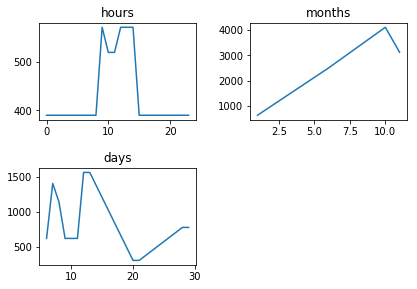

In [212]:
plt.figure(1)

# linear
plt.subplot(221)
plt.plot(j)
plt.title('hours')


plt.subplot(222)
plt.plot(k)
plt.title('months')

# symmetric log
plt.subplot(223)
plt.plot(l)
plt.title('days')


plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.50,
                    wspace=0.35)

plt.show()

In [ ]:
### closer view

In [218]:
days.sort()
hours.sort()
months.sort()

In [219]:
from collections import Counter
days1 = Counter(days)
hours1 = Counter(hours)

months1 = Counter(months)



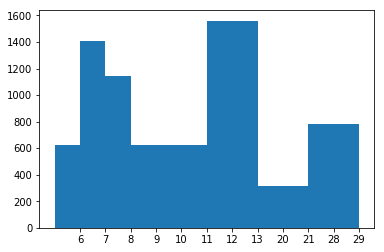

In [220]:
#   # of readings per day of month
labels, values = zip(*Counter(days1).items())

indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

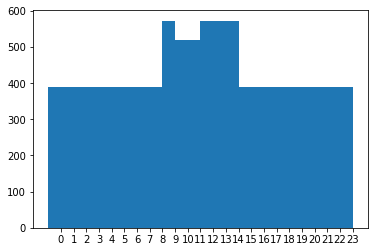

In [221]:
#many readings taken between 9am and 2pm
labels, values = zip(*Counter(hours1).items())

indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

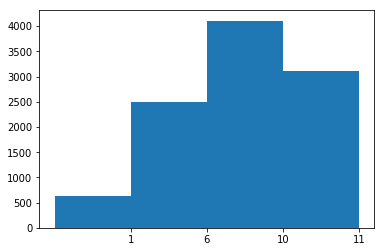

In [222]:
#lots of readings btween june and oct
labels, values = zip(*Counter(months1).items())

indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

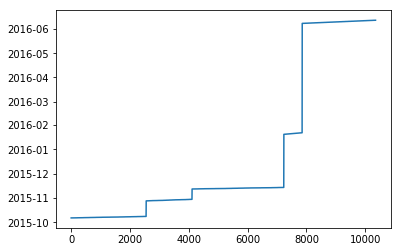

In [247]:
plt.plot(B.index) #cumulative number of readings over time
plt.show()

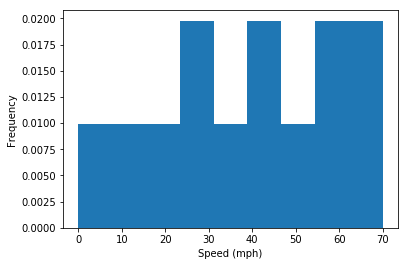

In [272]:
ind = np.isnan(speed)
plt.hist(speed[~ind], bins = np.linspace(0,70,10), normed = True)
plt.xlabel("Speed (mph)")
plt.ylabel("Frequency")
plt.show()